In [1]:
import os
import re

import dataframe_image as dfi
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dataset_folder = 'Datasets'
accepted_dataset = 'accepted_2007_to_2018Q4.csv.gz'
rejected_dataset = 'rejected_2007_to_2018Q4.csv.gz'

accepted_dataset_path = os.path.join(dataset_folder, accepted_dataset)
rejected_dataset_path = os.path.join(dataset_folder, rejected_dataset)

# General Dataset Information

In [3]:
accepted_df = pd.read_csv(accepted_dataset_path, compression='gzip')
accepted_df.head()

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/2427191060.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_df = pd.read_csv(accepted_dataset_path, compression='gzip')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rejected_df = pd.read_csv(rejected_dataset_path, compression='gzip')
rejected_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [5]:
print(accepted_df.info(), list(sorted(accepted_df.columns)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'i

In [6]:
print(rejected_df.info(), list(sorted(rejected_df.columns)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB
None ['Amount Requested', 'Application Date', 'Debt-To-Income Ratio', 'Employment Length', 'Loan Title', 'Policy Code', 'Risk_Score', 'State', 'Zip Code']


# Combining Accepted and Rejected datasets

In [7]:
# Label the datasets
accepted_df['loan_status'] = 'Accepted'
rejected_df['loan_status'] = 'Rejected'

# Select relevant columns from accepted_df to match rejected_df
accepted_df.rename(columns={'issue_d': 'date'}, inplace=True)
accepted_subset = accepted_df.loc[:,
                  ['date', 'purpose', 'loan_amnt', 'dti', 'emp_length', 'addr_state', 'zip_code', 'loan_status']]

# Rename columns in rejected_df to match accepted_subset
rejected_df.rename(
    columns={'Amount Requested': 'loan_amnt', 'Debt-To-Income Ratio': 'dti', 'Employment Length': 'emp_length',
             'State': 'addr_state', 'Zip Code': 'zip_code', 'Policy Code': 'policy_code', 'Loan Title': 'purpose',
             'Application Date': 'date'}, inplace=True)

# Select relevant columns from accepted_df to match rejected_df
rejected_subset = rejected_df.loc[:,
                  ['date', 'purpose', 'loan_amnt', 'dti', 'emp_length', 'addr_state', 'zip_code', 'loan_status']]

In [8]:
del accepted_df
del rejected_df

In [9]:
accepted_subset.head()

,date,purpose,loan_amnt,dti,emp_length,addr_state,zip_code,loan_status
0,Dec-2015,debt_consolidation,3600.0,5.91,10+ years,PA,190xx,Accepted
1,Dec-2015,small_business,24700.0,16.06,10+ years,SD,577xx,Accepted
2,Dec-2015,home_improvement,20000.0,10.78,10+ years,IL,605xx,Accepted
3,Dec-2015,debt_consolidation,35000.0,17.06,10+ years,NJ,076xx,Accepted
4,Dec-2015,major_purchase,10400.0,25.37,3 years,PA,174xx,Accepted


In [10]:
df_to_save = accepted_subset.head().style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_acc.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/1623522417.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = accepted_subset.head().style.hide_index()


In [11]:
rejected_subset.head()

,date,purpose,loan_amnt,dti,emp_length,addr_state,zip_code,loan_status
0,2007-05-26,Wedding Covered but No Honeymoon,1000.0,10%,4 years,NM,481xx,Rejected
1,2007-05-26,Consolidating Debt,1000.0,10%,< 1 year,MA,010xx,Rejected
2,2007-05-27,Want to consolidate my debt,11000.0,10%,1 year,MD,212xx,Rejected
3,2007-05-27,waksman,6000.0,38.64%,< 1 year,MA,017xx,Rejected
4,2007-05-27,mdrigo,1500.0,9.43%,< 1 year,MD,209xx,Rejected


In [12]:
df_to_save = rejected_subset.head().style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_rej.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/3885263728.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = rejected_subset.head().style.hide_index()


In [13]:
accepted_subset['date'] = pd.to_datetime(accepted_subset['date'], format='%b-%Y').dt.strftime('%b-%Y')
rejected_subset['date'] = pd.to_datetime(rejected_subset['date'], format='%Y-%m-%d').dt.strftime('%b-%Y')

In [14]:
accepted_subset.dti.describe().round(2)

count    2258957.00
mean          18.82
std           14.18
min           -1.00
25%           11.89
50%           17.84
75%           24.49
max          999.00
Name: dti, dtype: float64

In [15]:
df_to_save = accepted_subset.dti.describe().round(2).rename('DTI').reset_index().style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_sub_acc_dti.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/3231862246.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = accepted_subset.dti.describe().round(2).rename('DTI').reset_index().style.hide_index()


In [16]:
rejected_subset['dti'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27648741 entries, 0 to 27648740
Series name: dti
Non-Null Count     Dtype 
--------------     ----- 
27648741 non-null  object
dtypes: object(1)
memory usage: 210.9+ MB


In [17]:
rejected_subset['dti'] = rejected_subset['dti'].str.rstrip('%')
rejected_subset['dti'] = pd.to_numeric(rejected_subset['dti'], errors='coerce')

In [18]:
rejected_subset['dti'].describe().round(2)

count    27648741.00
mean          143.34
std         10539.16
min            -1.00
25%             8.06
50%            19.98
75%            36.61
max      50000031.49
Name: dti, dtype: float64

In [19]:
df_to_save = rejected_subset['dti'].describe().round(2).rename('DTI').reset_index().style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_sub_rej_dti.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/2938681835.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = rejected_subset['dti'].describe().round(2).rename('DTI').reset_index().style.hide_index()


In [20]:
accepted_subset.head()

,date,purpose,loan_amnt,dti,emp_length,addr_state,zip_code,loan_status
0,Dec-2015,debt_consolidation,3600.0,5.91,10+ years,PA,190xx,Accepted
1,Dec-2015,small_business,24700.0,16.06,10+ years,SD,577xx,Accepted
2,Dec-2015,home_improvement,20000.0,10.78,10+ years,IL,605xx,Accepted
3,Dec-2015,debt_consolidation,35000.0,17.06,10+ years,NJ,076xx,Accepted
4,Dec-2015,major_purchase,10400.0,25.37,3 years,PA,174xx,Accepted


In [21]:
rejected_subset.head()

,date,purpose,loan_amnt,dti,emp_length,addr_state,zip_code,loan_status
0,May-2007,Wedding Covered but No Honeymoon,1000.0,10.00,4 years,NM,481xx,Rejected
1,May-2007,Consolidating Debt,1000.0,10.00,< 1 year,MA,010xx,Rejected
2,May-2007,Want to consolidate my debt,11000.0,10.00,1 year,MD,212xx,Rejected
3,May-2007,waksman,6000.0,38.64,< 1 year,MA,017xx,Rejected
4,May-2007,mdrigo,1500.0,9.43,< 1 year,MD,209xx,Rejected


In [22]:
(accepted_subset.isna().sum() / len(accepted_subset) * 100).round(2).rename('Null Values (%)').reset_index().rename(columns={'index': 'Column'})

,Column,Null Values (%)
0,date,0.00
1,purpose,0.00
2,loan_amnt,0.00
3,dti,0.08
4,emp_length,6.50
5,addr_state,0.00
6,zip_code,0.00
7,loan_status,0.00


In [23]:
df_to_save = (accepted_subset.isna().sum() / len(accepted_subset) * 100).round(2).rename('Null Values (%)').reset_index().rename(columns={'index': 'Column'}).style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_sub_acc_na.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/4035979121.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = (accepted_subset.isna().sum() / len(accepted_subset) * 100).round(2).rename('Null Values (%)').reset_index().rename(columns={'index': 'Column'}).style.hide_index()


In [24]:
(rejected_subset.isna().sum() / len(rejected_subset) * 100).round(2).rename('Null Values (%)').reset_index().rename(columns={'index': 'Column'})

,Column,Null Values (%)
0,date,0.00
1,purpose,0.00
2,loan_amnt,0.00
3,dti,0.00
4,emp_length,3.44
5,addr_state,0.00
6,zip_code,0.00
7,loan_status,0.00


In [25]:
df_to_save = (rejected_subset.isna().sum() / len(rejected_subset) * 100).round(2).rename('Null Values (%)').reset_index().rename(columns={'index': 'Column'}).style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_sub_rej_na.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/3057300659.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = (rejected_subset.isna().sum() / len(rejected_subset) * 100).round(2).rename('Null Values (%)').reset_index().rename(columns={'index': 'Column'}).style.hide_index()


In [26]:
accepted_subset.dropna(inplace=True)
rejected_subset.dropna(inplace=True)

In [27]:
accepted_subset = accepted_subset[accepted_subset['dti'] >= 0]
rejected_subset = rejected_subset[rejected_subset['dti'] >= 0]

In [28]:
def remove_outliers(dframe):
    """
    Remove outliers from all numerical columns in the DataFrame using the IQR method.
    
    Parameters:
        - df: Input DataFrame.
    
    Returns:
        - DataFrame with outliers removed from numerical columns.
    """
    num_cols = dframe.select_dtypes(include=['number']).columns

    Q1 = dframe[num_cols].quantile(0.25)
    Q3 = dframe[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    outlier_condition = ~((dframe[num_cols] < (Q1 - 1.5 * IQR)) | (dframe[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

    df_without_outliers = dframe[outlier_condition]

    return df_without_outliers

In [29]:
accepted_subset = remove_outliers(accepted_subset)
rejected_subset = remove_outliers(rejected_subset)

In [30]:
df = pd.concat([accepted_subset, rejected_subset], ignore_index=True)
print(f'Rejected DF length: {len(rejected_subset)}')
print(f'Accepted DF length: {len(accepted_subset)}')

Rejected DF length: 23175151
Accepted DF length: 2063498


In [31]:
del accepted_subset
del rejected_subset

In [32]:
df.loan_status.value_counts()

Rejected    23175151
Accepted     2063498
Name: loan_status, dtype: int64

In [33]:
def map_to_main_purpose(title):
    title = title.lower()
    if re.search(r'home|renovat|house|mortgage|property|real\s?estate|improv|moving|move', title):
        return 'Home'
    elif re.search(r'car|auto|vehicle|motorcycle|truck|suv|sedan|transport|bike', title):
        return 'Auto'
    elif re.search(r'wedding|marriage|honeymoon|engagement|anniversary|personal|relationship|purchase|vacation', title):
        return 'Personal'
    elif re.search(r'medical|health|hospital|surgery|doctor|clinic|dental|pharma|treatment', title):
        return 'Medical'
    elif re.search(r'education|school|college|tuition|academic|study|studies|textbooks|university|course', title):
        return 'Education'
    elif re.search(r'business|company|startup|entrepreneur|expand|franchise|inventory|corporate|trade|inc', title):
        return 'Business'
    elif re.search(r'debt|consolidat|loan|credit|repay|borrow|financ|refinanc', title):
        return 'Financial'
    else:
        return 'Other'


df['purpose'] = df['purpose'].apply(map_to_main_purpose)
df.groupby('purpose')['loan_status'].value_counts()

purpose    loan_status
Auto       Rejected        4000907
           Accepted         496119
Business   Rejected         458399
           Accepted          23133
Education  Rejected           7751
           Accepted            415
Financial  Rejected       10776070
           Accepted        1168656
Home       Rejected        2166051
           Accepted         160908
Medical    Rejected         633080
           Accepted          24442
Other      Rejected        4029741
           Accepted         127484
Personal   Rejected        1103152
           Accepted          62341
Name: loan_status, dtype: int64

# Encode Categorical Features

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25238649 entries, 0 to 25238648
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   purpose      object 
 2   loan_amnt    float64
 3   dti          float64
 4   emp_length   object 
 5   addr_state   object 
 6   zip_code     object 
 7   loan_status  object 
dtypes: float64(2), object(6)
memory usage: 1.5+ GB


In [35]:
df.emp_length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year'],
      dtype=object)

In [36]:
df.emp_length = df.emp_length.str.replace(' years', '').str.replace(' year', '').replace(
    {'< 1': '0', '10+': '10'}).astype('int64')

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%b-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25238649 entries, 0 to 25238648
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   purpose      object        
 2   loan_amnt    float64       
 3   dti          float64       
 4   emp_length   int64         
 5   addr_state   object        
 6   zip_code     object        
 7   loan_status  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.5+ GB


In [38]:
df['year'] = df['date'].dt.year

In [39]:
df.groupby('year')['loan_status'].value_counts(normalize=True) * 100

year  loan_status
2007  Rejected       89.289520
      Accepted       10.710480
2008  Rejected       90.375256
      Accepted        9.624744
2009  Rejected       90.110116
      Accepted        9.889884
2010  Rejected       89.391288
      Accepted       10.608712
2011  Rejected       90.590337
      Accepted        9.409663
2012  Rejected       86.142897
      Accepted       13.857103
2013  Rejected       84.716516
      Accepted       15.283484
2014  Rejected       87.725889
      Accepted       12.274111
2015  Rejected       85.976344
      Accepted       14.023656
2016  Rejected       90.981888
      Accepted        9.018112
2017  Rejected       93.625381
      Accepted        6.374619
2018  Rejected       94.885029
      Accepted        5.114971
Name: loan_status, dtype: float64

In [40]:
len((df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index())

24

In [41]:
df_to_save = (df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index().rename(columns={'year': 'Year', 'loan_status': 'Loan Status'}).iloc[:8,:].style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_years_distribution1.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/2032008457.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = (df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index().rename(columns={'year': 'Year', 'loan_status': 'Loan Status'}).iloc[:8,:].style.hide_index()


In [42]:
df_to_save = (df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index().rename(columns={'year': 'Year', 'loan_status': 'Loan Status'}).iloc[8:16,:].style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_years_distribution2.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/416325056.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = (df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index().rename(columns={'year': 'Year', 'loan_status': 'Loan Status'}).iloc[8:16,:].style.hide_index()


In [43]:
df_to_save = (df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index().rename(columns={'year': 'Year', 'loan_status': 'Loan Status'}).iloc[16:,:].style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_years_distribution3.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/1780398180.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = (df.groupby('year')['loan_status'].value_counts(normalize=True) * 100).round(2).rename('Value Counts (%)').reset_index().rename(columns={'year': 'Year', 'loan_status': 'Loan Status'}).iloc[16:,:].style.hide_index()


In [44]:
df = df[(df['year'] > 2011) & (df['year'] < 2016)]
df['year'].describe().round(0)

count    5868635.0
mean        2014.0
std            1.0
min         2012.0
25%         2014.0
50%         2014.0
75%         2015.0
max         2015.0
Name: year, dtype: float64

In [45]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5868635 entries, 0 to 22720198
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   purpose      string        
 2   loan_amnt    Float64       
 3   dti          Float64       
 4   emp_length   Int64         
 5   addr_state   string        
 6   zip_code     string        
 7   loan_status  string        
 8   year         Int64         
dtypes: Float64(2), Int64(2), datetime64[ns](1), string(4)
memory usage: 470.1 MB


In [46]:
df.drop('date', axis=1, inplace=True)
df.drop('zip_code', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

In [47]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5868635 entries, 0 to 22720198
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   purpose      string 
 1   loan_amnt    Float64
 2   dti          Float64
 3   emp_length   Int64  
 4   addr_state   string 
 5   loan_status  string 
dtypes: Float64(2), Int64(1), string(3)
memory usage: 330.2 MB


In [48]:
df_to_save = df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'Data Type'}).style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_dtypes.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/3464585899.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'Data Type'}).style.hide_index()


In [49]:
states_dataset_dir = os.path.join('Datasets', 'states')
states_info = pd.read_csv(os.path.join(states_dataset_dir, 'cost-of-living-index-by-state-[updated-june-2023].csv'))
states_abbrevs = pd.read_csv(os.path.join(states_dataset_dir, 'state-abbrevs.csv'))

states_info.head(1)

,2023,state,GroceryCostsIndex,HealthCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
0,179.0,Hawaii,125.6,118.4,309.7,123.8,140.3,141.1


In [50]:
states_abbrevs.head(1)

,state,abbreviation
0,Alabama,AL


In [51]:
states_cost_of_living = (
    pd
    .merge(states_info[['2023', 'state']], states_abbrevs, on='state')
    .drop('state', axis=1)
    .rename(columns={'2023': 'state_cost_living', 'abbreviation': 'addr_state'})
)
states_cost_of_living.head()

,state_cost_living,addr_state
0,179.0,HI
1,148.7,DC
2,148.4,MA
3,134.5,CA
4,125.1,NY


In [52]:
df = pd.merge(df, states_cost_of_living, on='addr_state').drop('addr_state', axis=1)

In [53]:
del states_cost_of_living
del states_abbrevs
del states_info

In [54]:
df.loan_status.value_counts()

Rejected    5067508
Accepted     801127
Name: loan_status, dtype: Int64

In [55]:
df_to_save = df.loan_status.value_counts().reset_index().rename(columns={'index': 'Loan Status', 'loan_status': 'Value Counts'}).style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_value_counts_before.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/2935281186.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = df.loan_status.value_counts().reset_index().rename(columns={'index': 'Loan Status', 'loan_status': 'Value Counts'}).style.hide_index()


In [56]:
from sklearn.utils import resample

def stratified_sample(df, target, sample_size):
    classes = df[target].unique()
    class_dfs = []
    for c in classes:
        class_records = df[df[target] == c]
        class_sample = resample(class_records, replace=False, n_samples=int(sample_size / len(classes)),
                                random_state=42)
        class_dfs.append(class_sample)
    return pd.concat(class_dfs)


sampled_df = stratified_sample(df, 'loan_status', df.loan_status.value_counts().min() * 2)
del df

In [57]:
sampled_df.loan_status.value_counts()

Accepted    801127
Rejected    801127
Name: loan_status, dtype: Int64

In [58]:
df_to_save = sampled_df.loan_status.value_counts().reset_index().rename(columns={'index': 'Loan Status', 'loan_status': 'Value Counts'}).style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_value_counts_after.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/668108313.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = sampled_df.loan_status.value_counts().reset_index().rename(columns={'index': 'Loan Status', 'loan_status': 'Value Counts'}).style.hide_index()


In [59]:
def save_plot(data, plot_type, image_path, x=None, y=None, hue=None, x_label=None, y_label=None, title=None, figsize=(10, 6), **kwargs):
    """
    Save a given type of plot as an image.

    Args:
    - data: DataFrame or Series with the data to be plotted.
    - plot_type: Type of plot (e.g., "line", "bar", "boxplot", "countplot").
    - image_path: Path where the image will be saved.
    - x: Name of variable mapped to x-axis.
    - y: Name of variable mapped to y-axis.
    - hue: Name of variable to map to hue.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - title: Title of the plot.
    - figsize: Dimensions of the image.
    - kwargs: Additional keyword arguments for Seaborn plotting functions.
    """
    
    # Setting aesthetics using Seaborn
    sns.set(style="white", context="notebook", font_scale=1.2)
    
    plt.figure(figsize=figsize)
    
    if plot_type == "boxplot":
        sns.boxplot(data=data, x=x, y=y, hue=hue, **kwargs)
    elif plot_type == "countplot":
        sns.countplot(data=data, x=x, hue=hue, **kwargs)
    
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.savefig(image_path, dpi=300)
    plt.close()

In [60]:
sampled_df.groupby('loan_status')['state_cost_living'].describe().T

loan_status,Accepted,Rejected
count,801127.000000,801127.000000
mean,108.016703,106.471143
std,17.744254,17.556012
min,85.300000,85.300000
25%,93.000000,93.000000
50%,102.300000,101.300000
75%,125.100000,119.500000
max,179.000000,179.000000


In [61]:
df_to_save = sampled_df.groupby('loan_status')['state_cost_living'].describe()
dfi.export(df_to_save, os.path.join('images', 'df_state_cost.png'), dpi=300)

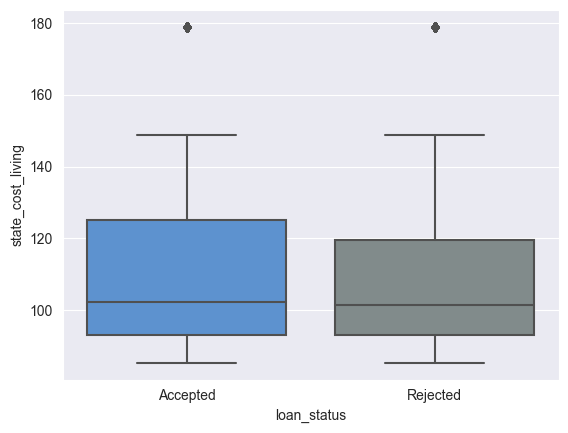

In [62]:
sns.boxplot(sampled_df, x='loan_status', y='state_cost_living', palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'})
plt.show()

In [63]:
save_plot(sampled_df, 'boxplot', os.path.join('images', 'box_state_cost.png'), x='loan_status', y='state_cost_living', palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'},
          x_label='Loan Status', y_label="State's Cost of Living")

In [64]:
sampled_df.groupby('purpose')['loan_status'].value_counts().rename('Count').reset_index().sort_values(['purpose', 'loan_status']).rename(columns={'purpose': 'Purpose', 'loan_status': 'Loan Status'})

,Purpose,Loan Status,Count
0,Auto,Accepted,196522
1,Auto,Rejected,129800
3,Business,Accepted,8164
2,Business,Rejected,25119
5,Education,Accepted,1
4,Education,Rejected,119
6,Financial,Accepted,480373
7,Financial,Rejected,389279
9,Home,Accepted,53045
8,Home,Rejected,81240


In [65]:
df_to_save = sampled_df.groupby('purpose')['loan_status'].value_counts().rename('Count').reset_index().sort_values(['purpose', 'loan_status']).rename(columns={'purpose': 'Purpose', 'loan_status': 'Loan Status'}).iloc[:8,:].style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_purpose1.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/2346346231.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = sampled_df.groupby('purpose')['loan_status'].value_counts().rename('Count').reset_index().sort_values(['purpose', 'loan_status']).rename(columns={'purpose': 'Purpose', 'loan_status': 'Loan Status'}).iloc[:8,:].style.hide_index()


In [66]:
df_to_save = sampled_df.groupby('purpose')['loan_status'].value_counts().rename('Count').reset_index().sort_values(['purpose', 'loan_status']).rename(columns={'purpose': 'Purpose', 'loan_status': 'Loan Status'}).iloc[8:,:].style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_purpose2.png'), dpi=300)

/var/folders/tk/06psnnyj2vd73shcw610zxtr0000gn/T/ipykernel_20846/2186675540.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_to_save = sampled_df.groupby('purpose')['loan_status'].value_counts().rename('Count').reset_index().sort_values(['purpose', 'loan_status']).rename(columns={'purpose': 'Purpose', 'loan_status': 'Loan Status'}).iloc[8:,:].style.hide_index()


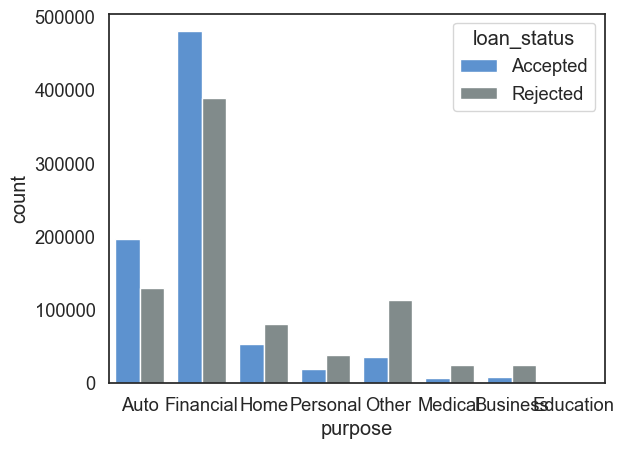

In [67]:
sns.countplot(sampled_df, x='purpose', hue='loan_status', palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'})
plt.show()

In [68]:
save_plot(sampled_df, 'countplot', os.path.join('images', 'count_purpose.png'), x='purpose', hue='loan_status',
          palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'},
          x_label='Purpose', y_label="Count")

In [69]:
sampled_df.groupby('loan_status')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Accepted,801127.0,6.064927,3.66236,0.0,3.0,7.0,10.0,10.0
Rejected,801127.0,0.740873,2.144633,0.0,0.0,0.0,0.0,10.0


In [70]:
df_to_save = sampled_df.groupby('loan_status')['emp_length'].describe()
dfi.export(df_to_save, os.path.join('images', 'df_emp_length.png'), dpi=300)

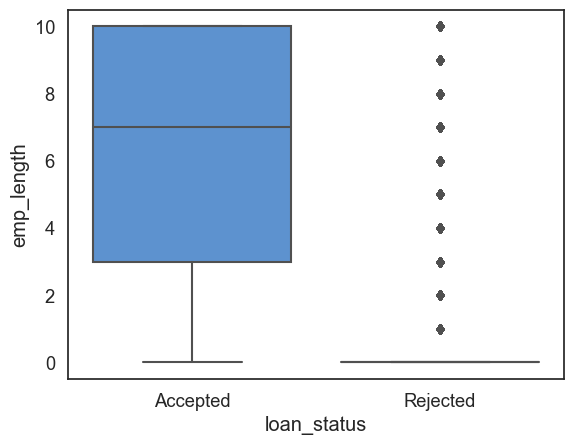

In [71]:
sns.boxplot(sampled_df, x='loan_status', y='emp_length', palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'})
plt.show()

In [72]:
save_plot(sampled_df, 'boxplot', os.path.join('images', 'box_emp.png'), x='loan_status', y='emp_length',
          palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'},
          x_label='Loan Status', y_label="Employment Length")

In [73]:
sampled_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Accepted,801127.0,15107.580664,8454.989976,1000.0,8575.0,13900.0,20000.0,35000.0
Rejected,801127.0,12501.506016,10449.57326,1000.0,4500.0,10000.0,20000.0,42500.0


In [74]:
df_to_save = sampled_df.groupby('loan_status')['loan_amnt'].describe()
dfi.export(df_to_save, os.path.join('images', 'df_loan_amnt.png'), dpi=300)

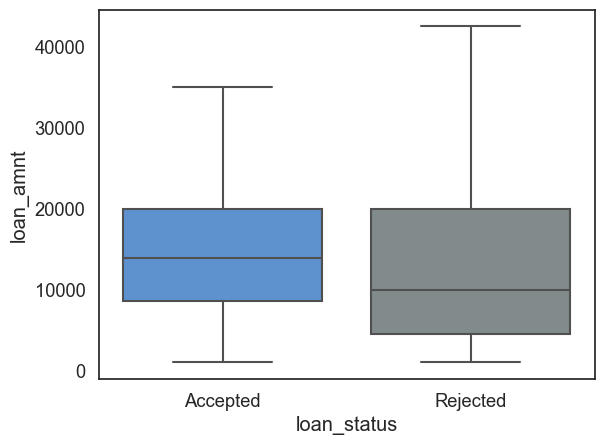

In [75]:
sns.boxplot(sampled_df, x='loan_status', y='loan_amnt', palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'})
plt.show()

In [76]:
save_plot(sampled_df, 'boxplot', os.path.join('images', 'box_amount.png'), x='loan_status', y='loan_amnt',
          palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'},
          x_label='Loan Status', y_label="Loan Amount")

In [77]:
sampled_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Accepted,801127.0,18.297558,8.262745,0.0,12.09,17.81,24.13,42.64
Rejected,801127.0,21.582877,16.899674,0.0,8.05,18.31,32.17,79.71


In [78]:
df_to_save = sampled_df.groupby('loan_status')['dti'].describe()
dfi.export(df_to_save, os.path.join('images', 'df_dti.png'), dpi=300)

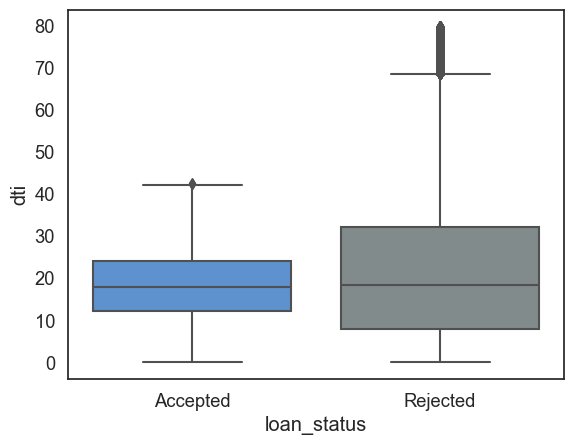

In [79]:
sns.boxplot(sampled_df, x='loan_status', y='dti', palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'})
plt.show()

In [80]:
save_plot(sampled_df, 'boxplot', os.path.join('images', 'box_dti.png'), x='loan_status', y='dti',
          palette={'Accepted': '#4A90E2', 'Rejected': '#7F8C8D'},
          x_label='Loan Status', y_label="DTI")

In [81]:
from pycaret.classification import setup, compare_models
from pycaret.classification import pull

clf1 = setup(data=sampled_df,
             target='loan_status',
             categorical_features=['purpose'],
             numeric_features=['loan_amnt', 'dti', 'emp_length', 'state_cost_living'])

best_model = compare_models(n_select=3)
print(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:18:40
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[<catboost.core.CatBoostClassifier object at 0x3bebfda90>, XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_

In [82]:
compare_result = pull()
compare_result

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9197,0.9685,0.9139,0.9246,0.9192,0.8394,0.8394,44.141
xgboost,Extreme Gradient Boosting,0.9196,0.9683,0.9139,0.9245,0.9192,0.8393,0.8394,21.463
lightgbm,Light Gradient Boosting Machine,0.9170,0.9670,0.9134,0.9200,0.9167,0.8340,0.8340,2.982
gbc,Gradient Boosting Classifier,0.9109,0.9627,0.9141,0.9083,0.9112,0.8218,0.8218,25.192
ada,Ada Boost Classifier,0.9088,0.9594,0.9103,0.9076,0.9090,0.8177,0.8177,6.893
knn,K Neighbors Classifier,0.8960,0.9370,0.8918,0.8994,0.8956,0.7920,0.7921,3.754
rf,Random Forest Classifier,0.8958,0.9503,0.8891,0.9012,0.8951,0.7916,0.7917,30.370
et,Extra Trees Classifier,0.8891,0.9403,0.8853,0.8921,0.8887,0.7782,0.7783,43.122
dt,Decision Tree Classifier,0.8686,0.8701,0.8697,0.8677,0.8687,0.7371,0.7371,1.998
nb,Naive Bayes,0.8549,0.9164,0.8940,0.8291,0.8603,0.7097,0.7119,1.005


In [126]:
df_to_save = compare_result
dfi.export(df_to_save, os.path.join('images', 'models_comparison.png'), dpi=300)

In [87]:
catboost_model = best_model[0]

In [88]:
params = catboost_model.get_all_params()
params

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 425,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.206637

In [89]:
for k in ['bayesian_matrix_reg', 'force_unit_auto_pair_weights', 'pool_metainfo_options', 'cat_features', 'class_names']:
    params.pop(k, None)
params

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'eval_fraction': 0,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 425,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.20663799345493317,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootstrap_type': 'MVS',
 'max_leaves': 64}

In [90]:
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostClassifier

def get_model(df_prep):
    clf = CatBoostClassifier(cat_features=['purpose'], **params)

    y = df_prep['loan_status']
    X = df_prep.drop(columns=['loan_status'])

    y_pred = cross_val_predict(clf, X, y, cv=5, n_jobs=4)
    
    clf.fit(X, y)

    return clf, X, y, y_pred

clf, X, y, y_pred = get_model(sampled_df)

0:	learn: 0.4873624	total: 948ms	remaining: 15m 46s
1:	learn: 0.3937613	total: 2.25s	remaining: 18m 43s
2:	learn: 0.3414675	total: 3.34s	remaining: 18m 28s
3:	learn: 0.3106636	total: 4.45s	remaining: 18m 29s
4:	learn: 0.2936627	total: 5.18s	remaining: 17m 10s
5:	learn: 0.2807435	total: 5.8s	remaining: 16m
6:	learn: 0.2729507	total: 6.4s	remaining: 15m 7s
7:	learn: 0.2675379	total: 7.03s	remaining: 14m 31s
8:	learn: 0.2630772	total: 7.63s	remaining: 13m 59s
9:	learn: 0.2597922	total: 8.42s	remaining: 13m 53s
10:	learn: 0.2576912	total: 8.99s	remaining: 13m 28s
11:	learn: 0.2544450	total: 9.63s	remaining: 13m 13s
12:	learn: 0.2526060	total: 10.2s	remaining: 12m 53s
13:	learn: 0.2512566	total: 10.8s	remaining: 12m 41s
14:	learn: 0.2499357	total: 11.5s	remaining: 12m 35s
15:	learn: 0.2491358	total: 12.2s	remaining: 12m 27s
16:	learn: 0.2475521	total: 12.7s	remaining: 12m 13s
17:	learn: 0.2470761	total: 13.3s	remaining: 12m 7s
18:	learn: 0.2461247	total: 14.2s	remaining: 12m 11s
19:	learn: 

In [91]:
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score,
                             precision_score, f1_score, cohen_kappa_score, matthews_corrcoef)

# Use model to get the predicted probabilities for the positive class
y_prob = clf.predict_proba(X)[:, 1]

# Calculate each metric
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
recall = recall_score(y, y_pred, pos_label='Accepted')
precision = precision_score(y, y_pred, pos_label='Accepted')
f1 = f1_score(y, y_pred, pos_label='Accepted')
kappa = cohen_kappa_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

print("=======================================")

Accuracy: 0.9202
AUC: 0.9698
Recall: 0.9264
Precision: 0.9150
F1 Score: 0.9207
Cohen's Kappa: 0.8403
Matthews Correlation Coefficient: 0.8404


In [124]:
perf = {
    'Accuracy': accuracy,
    'AUC': auc,
    'Recall': recall,
    'Precision': precision,
    'F1': f1,
    'Kappa': kappa,
    'MCC': mcc
}
perf_df = pd.DataFrame([perf])
perf_df

,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC
0,0.920162,0.969763,0.926409,0.914978,0.920658,0.840325,0.840391


In [125]:
df_to_save = perf_df.style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'after_5_fold_perfs.png'), dpi=300)

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred, normalize='true')
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[0.92640867 0.07359133]
 [0.08608373 0.91391627]]


In [93]:
from pycaret.classification import *

plot_model(catboost_model, plot = 'auc', scale = 3, save = True)

'AUC.png'

In [94]:
plot_model(catboost_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True}, save = True)

'Confusion Matrix.png'

In [95]:
clf.save_model("catboost_model.cbm")
X.to_csv('X.csv', index=False)

In [96]:
y.to_csv('y.csv', index=False)

In [97]:
import shap
from catboost import Pool

def preprocess_data(data: dict) -> pd.DataFrame:
    df_in = pd.DataFrame([data])
    states_info = pd.read_csv('Datasets/states/cost-of-living-index-by-state-[updated-june-2023].csv')
    states_abbrevs = pd.read_csv('Datasets/states/state-abbrevs.csv')
    states_cost_of_living = (
        pd
        .merge(states_info[['2023', 'state']], states_abbrevs, on='state')
        .drop('state', axis=1)
        .rename(columns={'2023': 'state_cost_living', 'abbreviation': 'addr_state'})
    )
    features_order = X.columns
    return pd.merge(df_in, states_cost_of_living, on='addr_state').drop('addr_state', axis=1)[features_order]

def get_explainer():
    return shap.TreeExplainer(clf)


def get_shap_values(explainer, instance_df, predict_df):
    shap_values = explainer.shap_values(Pool(instance_df, predict_df, cat_features=['purpose']))
    return shap_values


def get_comprehensive_shap_values(explainer, instance_df, predict_df):
    shap_values = get_shap_values(explainer, instance_df, predict_df)
    return dict(zip(instance_df.columns, shap_values[0]))


def get_summary_plot(explainer):
    shap_values = get_shap_values(explainer, X, y)
    shap.summary_plot(shap_values, X, feature_names=X.columns)
    
    
def map_column(column_name: str):
    if column_name == 'purpose':
        return 'Purpose'
    elif column_name == 'loan_amnt':
        return 'Loan Amount'
    elif column_name == 'dti':
        return 'DTI'
    elif column_name == 'emp_length':
        return 'Employment Length'
    elif column_name == 'state_cost_living':
        return "State's Cost of Living (derived from Address State)"
    else:
        return "Unknown feature"


def get_explanations(explainer, instance_df, predict_df):
    shap_values = get_shap_values(explainer, instance_df, predict_df)
    explanation = ''
    columns = [map_column(column_name) for column_name in instance_df.columns]
    zipped = list(zip(shap_values[0], columns))
    zipped = sorted(zipped, key=lambda x: abs(x[0]), reverse=True)
    for i, (shap_value, feature) in enumerate(zipped[:5], start=1):
        if shap_value < 0:
            explanation += f'\t{i} - Your {feature} had a positive impact on the output\n'
        elif shap_value > 0:
            explanation += f'\t{i} - Your {feature} had a negative impact on the output\n'
        else:
            explanation += f'\t{i} - Your {feature} had no impact on the output\n'
    
    final_explanation = (f"Based on the provided data and our analysis, here's a detailed breakdown of the features sorted by influence:\n"
                         f"{explanation}")
    return final_explanation


def get_force_plot(explainer, instance_df, predict_df):
    shap_values= get_shap_values(explainer, instance_df, predict_df)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values, instance_df, feature_names=X.columns)

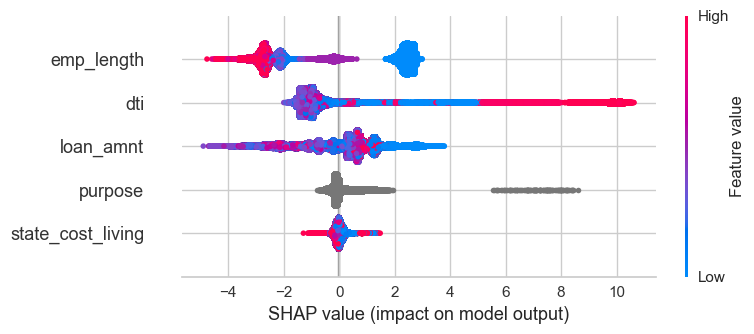

In [98]:
explainer = get_explainer()
get_summary_plot(explainer)

In [99]:
data = {
    "purpose": 'Education',
    "loan_amnt": 10000.0,
    "dti": 40.0,
    "emp_length": 10,
    "addr_state": 'AR'
}
data_df = preprocess_data(data)

prediction_df = clf.predict(data_df)
prediction_df

array(['Rejected'], dtype=object)

In [100]:
data_df

,purpose,loan_amnt,dti,emp_length,state_cost_living
0,Education,10000.0,40.0,10,90.3


In [101]:
df_to_save = data_df.style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'dataframe_image.png'), dpi=300)

In [102]:
shap_df = pd.DataFrame([get_comprehensive_shap_values(explainer, data_df, prediction_df)])
shap_df

,purpose,loan_amnt,dti,emp_length,state_cost_living
0,6.05579,0.594771,1.397266,-3.248429,-0.486781


In [103]:
df_to_save = shap_df.style.hide_index()
dfi.export(df_to_save, os.path.join('images', 'df_shap.png'), dpi=300)

In [104]:
get_force_plot(explainer, data_df, prediction_df)

In [105]:
print(get_explanations(explainer, data_df, prediction_df))

Based on the provided data and our analysis, here's a detailed breakdown of the features sorted by influence:
	1 - Your Purpose had a negative impact on the output
	2 - Your Employment Length had a positive impact on the output
	3 - Your DTI had a negative impact on the output
	4 - Your Loan Amount had a negative impact on the output
	5 - Your State's Cost of Living (derived from Address State) had a positive impact on the output


In [106]:
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_predict
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.pipeline import Pipeline
# 
# 
# def get_pipeline(df_prep):
#     dummy_transformer = Pipeline(steps=[
#         ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
#     ])
# 
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('dummy', dummy_transformer, dummy_columns)
#         ],
#         remainder='passthrough',
#         verbose=True
#     )
# 
#     clf = best_model
# 
#     model_pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         # ('scaler', MaxAbsScaler()),
#         ('classifier', clf)
#     ], verbose=True)
# 
#     y = df_prep['loan_status'].replace({'Accepted': '0', 'Rejected': '1'}).astype('Int64')
#     X = df_prep.drop(columns=['loan_status'])
# 
#     y_pred = cross_val_predict(model_pipeline, X, y, cv=5, n_jobs=-1, verbose=True)
#     print("CatBoost - Classification Report (5 Fold Cross-Validation):")
#     print(classification_report(y, y_pred))
#     print("=======================================")
# 
#     model_pipeline.fit(X, y)
# 
#     return model_pipeline, X
# 
# 
# model_pipe, X = get_pipeline(sampled_df)

In [107]:
# from pycaret.classification import plot_model
# 
# plot_model(model_pipe, plot = 'auc')

In [108]:
# features_order = list(model_pipe.feature_names_in_)
# features_order

In [109]:
# joblib.dump(model_pipe, "model_pipeline.pkl")
# X.to_csv('X.csv', index=False)
# 
# del model_pipe
# del X
# del df

In [110]:
# model_pipe: Pipeline = joblib.load('model_pipeline.pkl')
# X = pd.read_csv('X.csv')

In [111]:
# def preprocess_data(df_in):
#     return pd.merge(df_in, states_info[['addr_state', 'CostOfLiving']], on='addr_state').drop('addr_state',
#                                                                                               axis=1).rename(
#         columns={'CostOfLiving': 'state_cost_living'})[features_order]

In [112]:
# data = {
#     "loan_amnt": 10000.0,
#     "dti": 40.0,
#     "emp_length": 1,
#     "purpose": 'Education',
#     "addr_state": 'MS'
# }
# d_df = pd.DataFrame([data])
# d_df = preprocess_data(d_df)
# model_pipe.predict(d_df)

In [113]:
# one_hot_encoder = model_pipe.named_steps['preprocessor'].named_transformers_['dummy'].named_steps['onehot']
# one_hot_features = one_hot_encoder.get_feature_names_out(dummy_columns)

In [114]:
# original_columns = X.columns.tolist()
# passthrough_columns = [col for col in original_columns if col not in dummy_columns]

In [115]:
# final_feature_names = list(one_hot_features) + passthrough_columns
# final_feature_names

In [116]:
# def get_explainer(model_pipeline, df):
#     X_test_preprocessed = model_pipeline.named_steps['preprocessor'].transform(df)
#     X_test_preprocessed = model_pipeline.named_steps['scaler'].transform(X_test_preprocessed)
#     explainer = shap.KernelExplainer(model_pipeline.named_steps['classifier'].predict_proba,
#                                      shap.sample(X_test_preprocessed, 1000))
#     return explainer, X_test_preprocessed
# 
# 
# explainer, X_test_scaled = get_explainer(model_pipe, X)
# 
# 
# def preprocess_df(model_pipeline, instance):
#     X_test_preprocessed = model_pipeline.named_steps['preprocessor'].transform(instance)
#     X_test_preprocessed = model_pipeline.named_steps['scaler'].transform(X_test_preprocessed)
#     return X_test_preprocessed
# 
# 
# d_df_preprocessed = preprocess_df(model_pipe, d_df[model_pipe.feature_names_in_])

In [117]:
# shap_values = explainer.shap_values(d_df_preprocessed)
# 
# print("SHAP Summary Plot:")
# shap.summary_plot(shap_values, d_df_preprocessed, feature_names=final_feature_names)

In [118]:
# shap.initjs()  # Required for visual rendering
# shap.force_plot(explainer.expected_value[0], shap_values[0])

In [119]:
# shap.plots.waterfall(shap_values)

In [120]:
# shap_df = pd.DataFrame(shap_values, columns=final_feature_names)
# shap_df

In [121]:
# def explain_single_instance(instance, explainer, feature_names, model):
#     instance_scaled = model.named_steps['scaler'].transform(instance)
#     shap_values = explainer.shap_values(instance_scaled)
# 
#     shap_df = pd.DataFrame(shap_values, columns=feature_names)
#     prediction = model.predict(instance)
# 
#     approved_features = shap_df[shap_df > 0].dropna(axis=1)
#     rejected_features = shap_df[shap_df < 0].dropna(axis=1)
# 
#     if prediction == 0:
#         explanation = f"Your loan was approved because of these factors: {approved_features.columns.tolist()}"
#     else:
#         explanation = f"Your loan was rejected because of these factors: {rejected_features.columns.tolist()}"
# 
#     return explanation
# 
# 
# explain_single_instance(d_df, explainer, final_feature_names, model_pipe)